## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Checking library versions

In [3]:
import sklearn
import plotly

print(f'''Checking library versions:\n
pandas: {pd.__version__}
numpy: {np.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Checking library versions:

pandas: 1.5.3
numpy: 1.22.4
sklearn: 1.2.2
plotly: 5.13.1



## Colecting data

In [4]:
iris = pd.read_csv('/content/iris.csv', sep=';')

## Analyzing the collected data

In [8]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


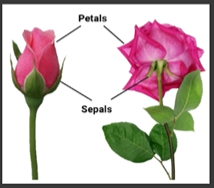

In [7]:
iris.tail()

,sepal length,sepal width,petal length,petal width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# Generating some statistics about the database
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Number of existing classes in dataframe
iris['Class']. unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Counting the classes's number
len(iris['Class']. unique())

3

In [13]:
# Evaluating the number of rows and columns of the dataset
iris.shape

(150, 5)

In [14]:
# Checking for any null or missing values
iris.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

In [16]:
# Checking Database information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Creating clusters with petal data
___________________________________________________________

For ours first experiment, we will realize data agroupment based in the length and the width of the petals.

### Colecting Petals Data

In [17]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Creating a variable X with the collums 'petal length' and 'petal width'
X_petal = iris.iloc[:,[2,3]].values
X_petal[:10]
## iloc means that we are taking all of the dataframe

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

### Normalizing database

When the data is on a very different scale, we need to normalize the data to the same standard and the same scale.

As Kmeans performs calculations based on distance, we must standardize the data so that one attribute is not considered more important than the other.

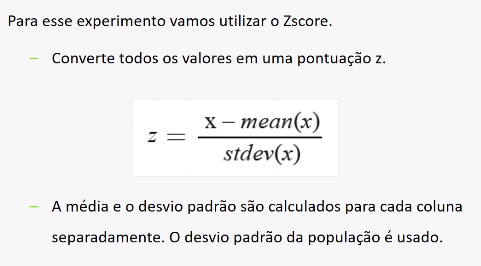

In [22]:
iris.describe()
# We call see that all values are in the same scale

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
normalize_date = StandardScaler()
X_petal = normalize_date.fit_transform(X_petal)
X_petal[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

### Calculation the cluster's number

To calculate the cluster number we will use the elbow (cotovelo) method.

WCSS is the sum of the squared distance between each point and the centroid in a cluster.

In [29]:
wcss_petal = []
# lista vazia

for i in range(1,11):
  kmeans_petal = KMeans(n_clusters=i, random_state=0)
  kmeans_petal.fit(X_petal)
  wcss_petal.append(kmeans_petal.inertia_)
#random_state=0 é "setar" a aleatóriedade

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

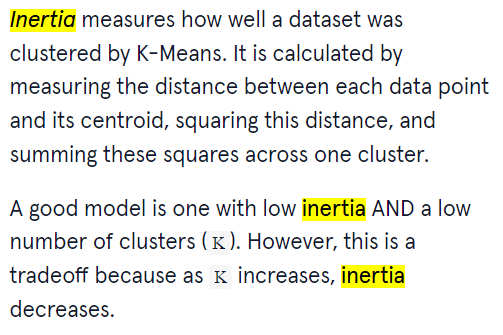

Site: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet


In [34]:
# Visualizing the WCSS values
for i in range(len(wcss_petal)):
  print(f'Cluster {i+1} - Value of WCSS: {wcss_petal[i]}')

Cluster 1 - Value of WCSS: 300.0000000000001
Cluster 2 - Value of WCSS: 54.14584701344988
Cluster 3 - Value of WCSS: 18.046983891906276
Cluster 4 - Value of WCSS: 12.307440251261843
Cluster 5 - Value of WCSS: 9.181131495513899
Cluster 6 - Value of WCSS: 7.215096212730807
Cluster 7 - Value of WCSS: 6.026593155951448
Cluster 8 - Value of WCSS: 5.173315218915379
Cluster 9 - Value of WCSS: 4.419290104197288
Cluster 10 - Value of WCSS: 3.9139417830543204


### Better defining the number of clusters for the petals

In [36]:
graphic_elbow_petal = px.line(x=range(1,11), y=wcss_petal)
graphic_elbow_petal.update_xaxes(title_text='Number of Clusters')
graphic_elbow_petal.update_yaxes(title_text='Value of WCSS')
graphic_elbow_petal.update_layout(title_text='Definition of Clusters Number', title_x=0.5)
graphic_elbow_petal.show()

## Executing the algoritm K-means to the petals

In [37]:
kmeans_petal = KMeans(n_clusters=3, random_state=0)
label_cluster_petal = kmeans_petal.fit_predict(X_petal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
# Checking Clusters's classification
label_cluster_petal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Viewing the centroids of each cluster



In [40]:
centroids_petal = kmeans_petal.cluster_centers_
centroids_petal 

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

### Viewing grouped data with petals's data

In [89]:
graphic_petal = px.scatter(x = X_petal[:,0], y=X_petal[:,1], color = label_cluster_petal)
graphic_centroid_petal = px.scatter(x = centroids_petal[:,0], y=centroids_petal[:,1], size=[7,7,7])
graphic_final = go.Figure(data=graphic_petal.data + graphic_centroid_petal.data)
graphic_final.update_xaxes(title_text='Length')
graphic_final.update_yaxes(title_text='Width')
graphic_final.update_layout(title_text='Clusters', title_x=0.5)
graphic_final.show()

In [90]:
centroids_petal 

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

## Creating cluters with sepals data
_________________________________________________________
Now let's group the data based on the length and width of the sepals

### Colecting Sepals Data

In [55]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
X_sepal = iris.iloc[:,[0,1]].values
X_sepal[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [67]:
X_sepal = normalize_date.fit_transform(X_sepal)
X_sepal[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

### Calculation of the WCSS value

In [68]:
wcss_sepal = []

for i in range(1,11):
  kmeans_sepal = KMeans(n_clusters=i, random_state=0)
  kmeans_sepal.fit(X_sepal)
  wcss_sepal.append(kmeans_sepal.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

### Defining the best number of sepal clusters

In [69]:
# Visualizing the WCSS values
for i in range(len(wcss_sepal)):
  print(f'Cluster {i+1} - Value of WCSS: {wcss_sepal[i]}')

Cluster 1 - Value of WCSS: 300.0
Cluster 2 - Value of WCSS: 168.39262198361087
Cluster 3 - Value of WCSS: 103.78982520596082
Cluster 4 - Value of WCSS: 79.78319156422033
Cluster 5 - Value of WCSS: 61.70659834761937
Cluster 6 - Value of WCSS: 52.13668525175612
Cluster 7 - Value of WCSS: 44.82457356697236
Cluster 8 - Value of WCSS: 36.22858628889425
Cluster 9 - Value of WCSS: 30.56569905329544
Cluster 10 - Value of WCSS: 26.796317715913396


In [70]:
graphic_elbow_sepal = px.line(x=range(1,11), y=wcss_sepal)
graphic_elbow_sepal.update_xaxes(title_text='Number of Clusters')
graphic_elbow_sepal.update_yaxes(title_text='Value of WCSS')
graphic_elbow_sepal.update_layout(title_text='Definition of Clusters Number', title_x=0.5)
graphic_elbow_sepal.show()

## Executing the algoritm K-means to the sepals



In [71]:
kmeans_sepal = KMeans(n_clusters=3, random_state=0)
label_cluster_sepal = kmeans_sepal.fit_predict(X_sepal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [73]:
label_cluster_sepal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [65]:
kmeans_sepal

KMeans(n_clusters=3, random_state=0)

### Viewing grouped data with sepals data

In [74]:
centroids_sepal = kmeans_sepal.cluster_centers_
centroids_sepal

array([[-0.04825457, -0.89224112],
       [-0.97822861,  0.89321545],
       [ 1.20144049,  0.14411561]])

### Viewing grouped data with sepals data

In [78]:
graphic_sepal = px.scatter(x = X_sepal[:,0], y=X_sepal[:,1], color = label_cluster_sepal)
graphic_centroid_sepal = px.scatter(x = centroids_sepal[:,0], y=centroids_sepal[:,1], size=[7,7,7])
graphic_final = go.Figure(data=graphic_sepal.data + graphic_centroid_sepal.data)
graphic_final.update_xaxes(title_text='Length')
graphic_final.update_yaxes(title_text='Width')
graphic_final.update_layout(title_text='Clusters', title_x=0.5)
graphic_final.show()

## Creating function for data visualization

In [98]:
def create_graphic(X, y, color, X_centroid, y_centroid):

  graphic = px.scatter(x = X, 
                       y = y, 
                       color = color)
  graphic_centroid = px.scatter(x = X_centroid,
                                y = y_centroid)
  graphic_final = go.Figure(data=graphic.data + graphic_centroid.data)
  graphic_final.update_xaxes(title_text='Length')
  graphic_final.update_yaxes(title_text='Width')
  graphic_final.update_layout(title_text='Clusters', title_x=0.5)
  graphic_final.show()


### Executing the function for petals

In [99]:
X = X_petal[:,0]
y = X_petal[:,1]
color = label_cluster_petal
X_centroid = centroids_petal[:,0]
y_centroid = centroids_petal[:,1]

create_graphic(X, y, color, X_centroid, y_centroid)

### Executing the function for sepals


In [100]:
X = X_sepal[:,0]
y = X_sepal[:,1]
color = label_cluster_sepal
X_centroid = centroids_sepal[:,0]
y_centroid = centroids_sepal[:,1]

create_graphic(X, y, color, X_centroid, y_centroid)